In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', header=None, delim_whitespace=True,
                        names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                               'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [3]:
 #first few rows of the dataframe
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
 #information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#shape of dataframe
data.shape

(506, 14)

In [6]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [7]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Calculate the minimum, maximum, mean, median, and standard deviation of the MEDV column in the data DataFrame
minimum_price = data['MEDV'].min()
maximum_price = data['MEDV'].max()
mean_price = data['MEDV'].mean()
median_price = data['MEDV'].median()
std_price = data['MEDV'].std()
# Display the calculated statistics
print("Statistics for Boston housing dataset:")
print(f"Minimum price: ${minimum_price:.2f}")
print(f"Maximum price: ${maximum_price:.2f}")
print(f"Mean price: ${mean_price:.2f}")
print(f"Median price: ${median_price:.2f}")
print(f"Standard deviation of prices: ${std_price:.2f}")


Statistics for Boston housing dataset:
Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price: $21.20
Standard deviation of prices: $9.20


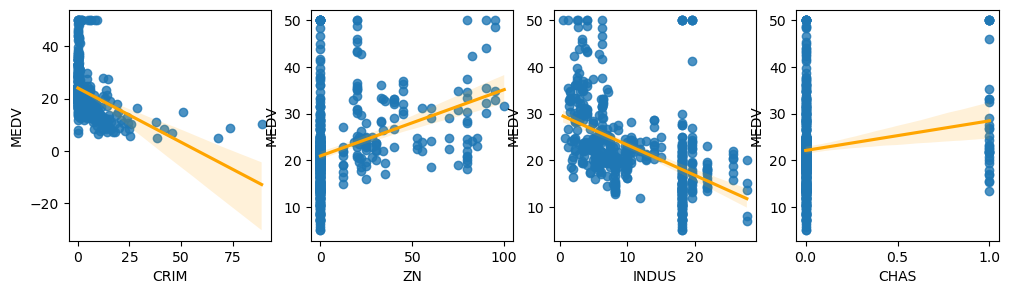

In [10]:
# Visualize the data
# Pairplot for features 'CRIM', 'ZN', 'INDUS', and 'CHAS' vs target variable 'MEDV' with orange linear regression lines
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
sns.regplot(x='CRIM', y='MEDV', data=data, ax=ax[0], line_kws={'color': 'orange'})
sns.regplot(x='ZN', y='MEDV', data=data, ax=ax[1], line_kws={'color': 'orange'})
sns.regplot(x='INDUS', y='MEDV', data=data, ax=ax[2], line_kws={'color': 'orange'})
sns.regplot(x='CHAS', y='MEDV', data=data, ax=ax[3], line_kws={'color': 'orange'})
plt.show()

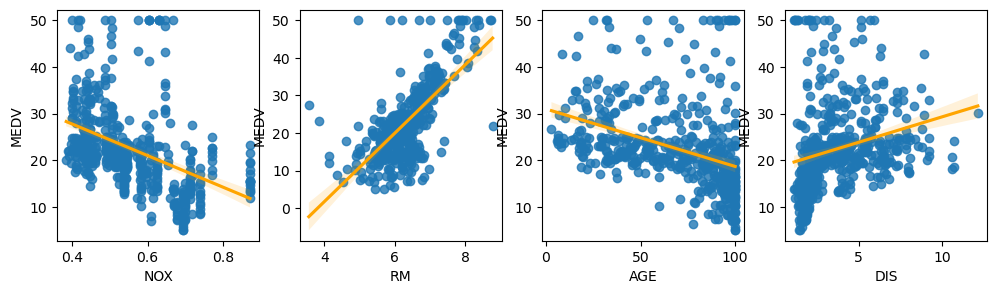

In [11]:
# Pairplot for features 'NOX', 'RM', 'AGE', and 'DIS' vs target variable 'MEDV' with orange linear regression lines
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
sns.regplot(x='NOX', y='MEDV', data=data, ax=ax[0], line_kws={'color': 'orange'})
sns.regplot(x='RM', y='MEDV', data=data, ax=ax[1], line_kws={'color': 'orange'})
sns.regplot(x='AGE', y='MEDV', data=data, ax=ax[2], line_kws={'color': 'orange'})
sns.regplot(x='DIS', y='MEDV', data=data, ax=ax[3], line_kws={'color': 'orange'})
plt.show()

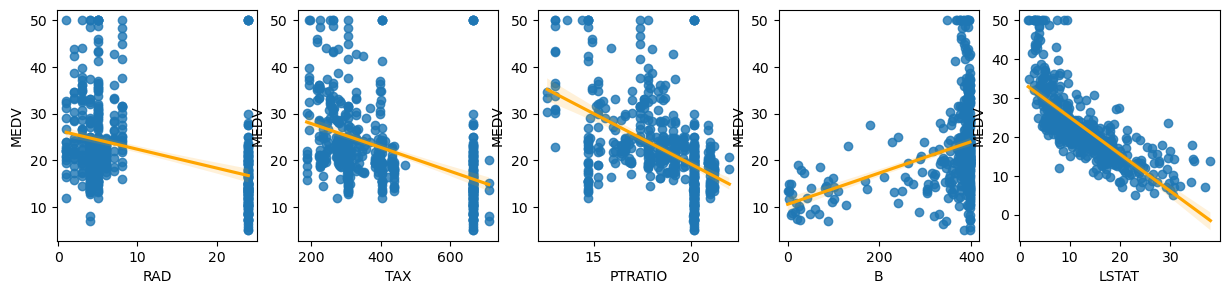

In [12]:
# Pairplot for features 'RAD', 'TAX', 'PTRATIO', 'B', and 'LSTAT' vs target variable 'MEDV' with orange linear regression lines
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
sns.regplot(x='RAD', y='MEDV', data=data, ax=ax[0], line_kws={'color': 'orange'})
sns.regplot(x='TAX', y='MEDV', data=data, ax=ax[1], line_kws={'color': 'orange'})
sns.regplot(x='PTRATIO', y='MEDV', data=data, ax=ax[2], line_kws={'color': 'orange'})
sns.regplot(x='B', y='MEDV', data=data, ax=ax[3], line_kws={'color': 'orange'})
sns.regplot(x='LSTAT', y='MEDV', data=data, ax=ax[4], line_kws={'color': 'orange'})
plt.show()

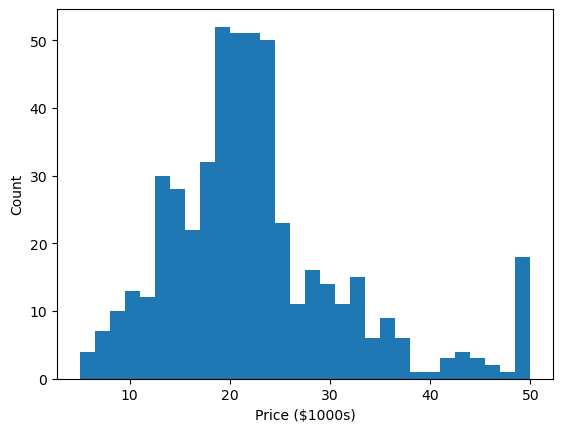

In [13]:
# Plot a histogram of the target variable
plt.hist(data['MEDV'], bins=30) 
plt.xlabel('Price ($1000s)')
plt.ylabel('Count')
plt.show()

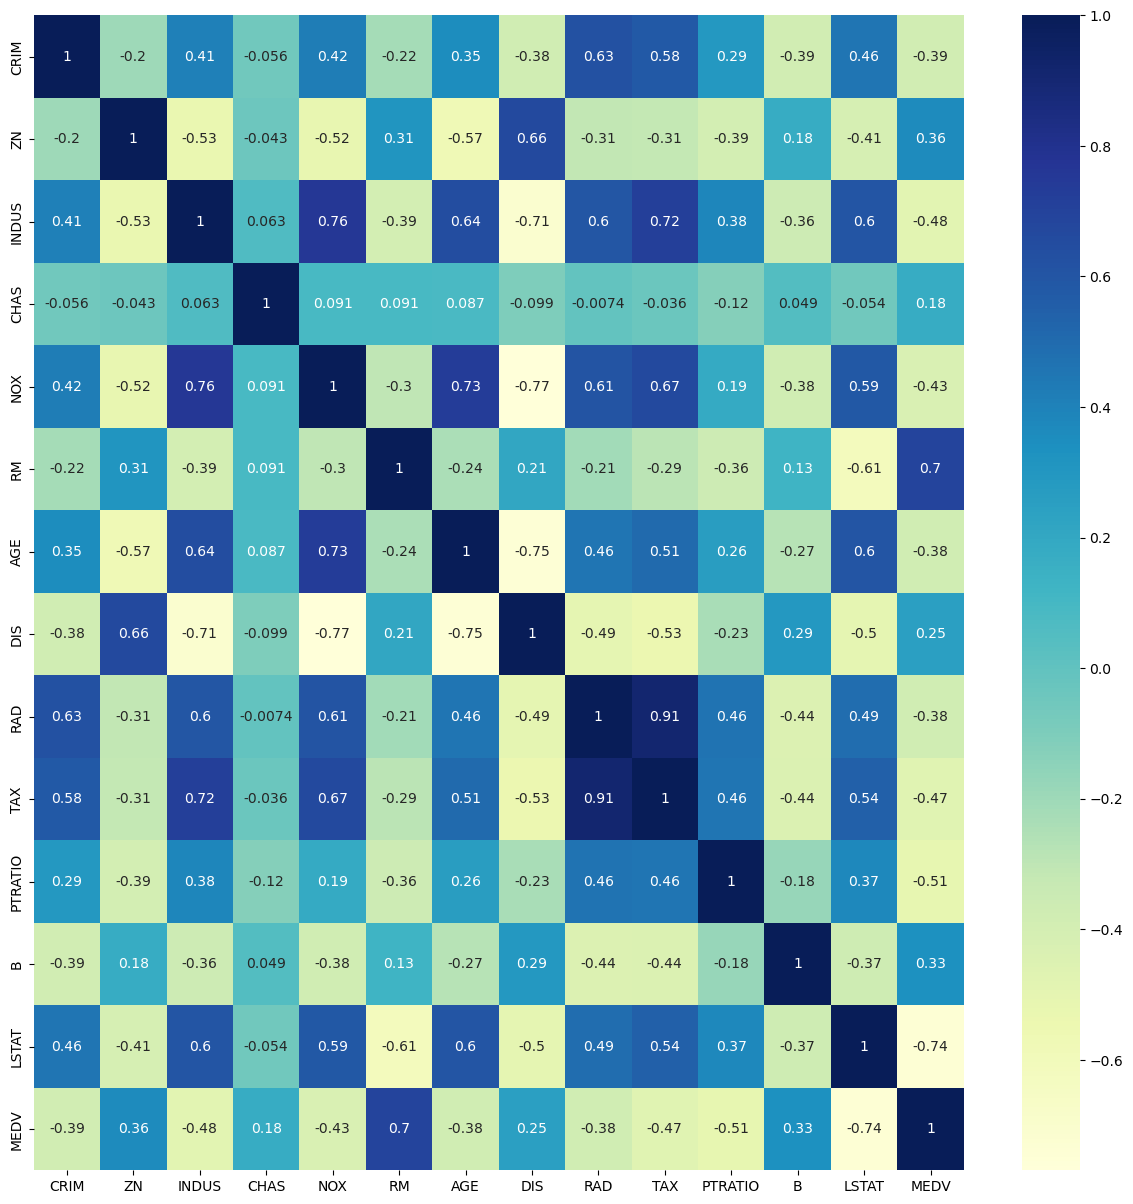

In [14]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15,15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [15]:
# Preprocess the data with feature names and assign column names
X = data.drop(['MEDV'], axis=1)
X.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Get the target variable
y = data['MEDV']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Preprocess the data by standardizing and adding polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(poly.fit_transform(X_train))
X_test_scaled = scaler.transform(poly.transform(X_test))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Feature Selection with Lasso regression
lasso = Lasso(alpha=0.0005, max_iter=10000)
selector = SelectFromModel(lasso)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [19]:
# Ensemble Methods with Gradient Boosting Regressor 
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(X_train_selected, y_train)

GradientBoostingRegressor(n_estimators=500)

In [20]:
# Make predictions on the testing set
y_pred_gbr = gbr.predict(X_test_selected)

In [21]:
# Calculate the mean squared error and R-squared value of the Gradient Boosting Regressor predictions 
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
# Print the mean squared error and R-squared value and Accuracy
print("Gradient Boosting Regressor:")
print("Mean Squared Error: ", round(mse_gbr, 3))
print("R-squared value: ", round(r2_gbr, 3))
print("Accuracy of the model: ", round(r2_gbr*100, 2), "%")

Gradient Boosting Regressor:
Mean Squared Error:  5.905
R-squared value:  0.919
Accuracy of the model:  91.95 %


In [22]:
# Get the predicted and actual prices from the test set for the first test sample
test_sample_index = 0
predicted_price = gbr.predict(X_test_selected[test_sample_index].reshape(1, -1))[0]
actual_price = y_test.values[test_sample_index]

# Print the predicted and actual prices for the first test sample
print("Predicted Price: ", round(predicted_price, 2))
print("Actual Price: ", round(actual_price, 2))

Predicted Price:  23.77
Actual Price:  23.6


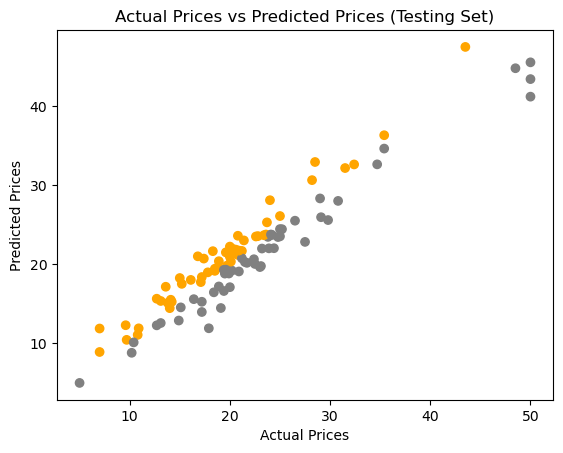

In [23]:
# Visualize the difference between actual and predicted prices on the testing set
colors = ['grey' if actual > pred else 'orange' for actual, pred in zip(y_test, y_pred_gbr)]
plt.scatter(y_test, y_pred_gbr, color=colors)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Testing Set)")
plt.show()